In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

2023-06-15 22:49:34.777522: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-15 22:49:34.893789: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-15 22:49:34.899549: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-15 22:49:34.899571: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
businesses = _deepnote_execute_sql('SELECT serial as id, name FROM businesses', 'SQL_5C5D2FB1_2915_47AF_A658_34E9F21C61A9', audit_sql_comment='', sql_cache_mode='cache_disabled')
businesses

,id,name
0,1,Natural bordir terminal kelet
1,2,Wr Bakso Mbak nurul
2,3,TB Lumintu
3,4,OCTAVIA ID
4,5,Bpk ngalawi (bkl. Kambing)
...,...,...
544,545,Nares Cell
545,546,Sol Sepatu
546,547,Ms Glow
547,548,Basreng Mega Jaya


In [3]:
businesses.loc[businesses['id'] > len(businesses) - 1, 'id'] = len(businesses) - 1

In [4]:
df_businesses = businesses.set_index('id').copy()

In [5]:
train_data, test_data = train_test_split(df_businesses, test_size=0.2, random_state=42)

In [6]:
vectorizer = CountVectorizer()

vectorizer.fit(train_data['name'])

train_vectors = vectorizer.transform(train_data['name']).toarray()
test_vectors = vectorizer.transform(test_data['name']).toarray()

In [7]:
from tensorflow.keras import layers
model = tf.keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(train_vectors.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(df_businesses), activation='softmax')
])

2023-06-15 22:49:43.967307: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-15 22:49:43.967338: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-15 22:49:43.967352: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-fa0ff5c2-b244-406d-b1f4-a2f4cd653e27): /proc/driver/nvidia/version does not exist
2023-06-15 22:49:43.967619: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               201472    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 549)               70821     
                                                                 
Total params: 305,189
Trainable params: 305,189
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(train_vectors, train_data.index, epochs=50, batch_size=32, validation_data=(test_vectors, test_data.index))

Epoch 1/50
14/14 [==============================] - 1s 21ms/step - loss: 6.3162 - accuracy: 0.0000e+00 - val_loss: 6.3270 - val_accuracy: 0.0000e+00
Epoch 2/50
14/14 [==============================] - 0s 10ms/step - loss: 6.2449 - accuracy: 0.1230 - val_loss: 6.3705 - val_accuracy: 0.0000e+00
Epoch 3/50
14/14 [==============================] - 0s 10ms/step - loss: 6.1443 - accuracy: 0.2232 - val_loss: 6.5116 - val_accuracy: 0.0000e+00
Epoch 4/50
14/14 [==============================] - 0s 10ms/step - loss: 5.9861 - accuracy: 0.2096 - val_loss: 6.8907 - val_accuracy: 0.0000e+00
Epoch 5/50
14/14 [==============================] - 0s 10ms/step - loss: 5.7607 - accuracy: 0.1458 - val_loss: 7.5778 - val_accuracy: 0.0000e+00
Epoch 6/50
14/14 [==============================] - 0s 10ms/step - loss: 5.4991 - accuracy: 0.1617 - val_loss: 8.3411 - val_accuracy: 0.0000e+00
Epoch 7/50
14/14 [==============================] - 0s 10ms/step - loss: 5.2007 - accuracy: 0.3121 - val_loss: 9.1414 - val_ac

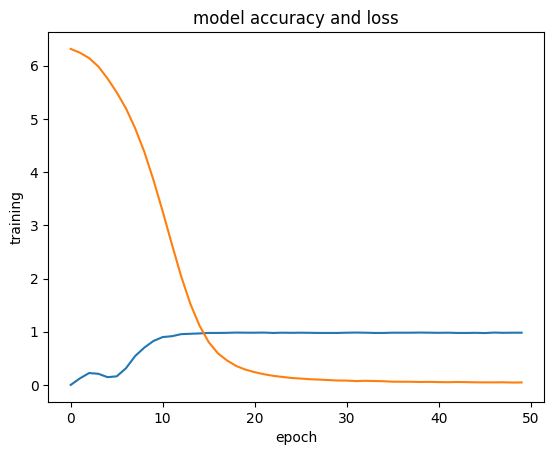

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('training')
plt.xlabel('epoch')
plt.show()

In [12]:
loss, accuracy = model.evaluate(test_vectors, test_data.index)
print('Test accuracy:', accuracy)

4/4 [==============================] - 0s 2ms/step - loss: 24.3165 - accuracy: 0.0000e+00
Test accuracy: 0.0


In [13]:
query = ["Laundry"]
query_vector = vectorizer.transform(query).toarray()
predictions = model.predict(query_vector)

1/1 [==============================] - 0s 74ms/step


In [14]:
similar_indices = predictions.argsort()[0][-5:]
similar_business_names = df_businesses['name'].iloc[similar_indices]

In [15]:
print("Similar business names:")
for name in similar_business_names:
    print(name)

Similar business names:
Simping Art
Toko Buku Murah Meriah
Struggleshoes
Salon Shinta
Erna Laundry


In [16]:
model.save('similar.h5')

In [17]:
import joblib

joblib.dump(vectorizer, "vectorized.joblib")

['vectorized.joblib']

In [18]:
from icecream import ic
loaded = tf.keras.models.load_model("similar.h5")
query = ["Angkringan Memet"]
vectorizer = joblib.load("vectorized.joblib")
query_vector = vectorizer.transform(query).toarray()
predictions = model.predict(query_vector)
similar_indices = predictions.argsort()[0][-5:]
ic(similar_indices)

1/1 [==============================] - 0s 19ms/step
ic| similar_indices: array([493,   9, 161,  17,   8])


array([493,   9, 161,  17,   8])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fa0ff5c2-b244-406d-b1f4-a2f4cd653e27' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>